In [57]:
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from math import sqrt
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model
from sklearn.metrics import r2_score

In [4]:
df= pd.read_csv("CO2_emission.csv")

In [5]:
df

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230,7
...,...,...,...,...,...,...,...,...,...,...,...,...
930,2021,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,10.7,7.7,9.4,219,5
931,2021,Volvo,XC60 T5 AWD,SUV: Small,2.0,4,AS8,11.1,8.3,9.9,230,5
932,2021,Volvo,XC60 T6 AWD,SUV: Small,2.0,4,AS8,11.7,8.6,10.3,240,7
933,2021,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,11.5,8.4,10.1,236,5


In [6]:
df.head()

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230,7


In [7]:
df.describe()

,Model_Year,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
count,935.0,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,2021.0,3.214866,5.716578,12.498610,9.306203,11.060214,258.529412,4.726203
std,0.0,1.388513,1.977359,3.487271,2.215819,2.867028,64.442768,1.712127
min,2021.0,1.000000,3.000000,4.000000,3.900000,4.000000,94.000000,1.000000
25%,2021.0,2.000000,4.000000,10.100000,7.700000,9.100000,213.000000,3.000000
50%,2021.0,3.000000,6.000000,12.000000,9.000000,10.700000,255.000000,5.000000
75%,2021.0,4.000000,8.000000,14.800000,10.800000,13.100000,303.500000,6.000000
max,2021.0,8.000000,16.000000,30.300000,20.900000,26.100000,608.000000,7.000000


In [8]:
new_df=df[['Engine_Size','Cylinders','Fuel_Consumption_comb(L/100km)','CO2_Emissions','Smog_Level']]
new_df.head()

,Engine_Size,Cylinders,Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2.4,4,8.6,199,3
1,3.5,6,11.0,256,3
2,2.0,4,9.9,232,6
3,2.0,4,10.3,242,6
4,2.0,4,9.8,230,7


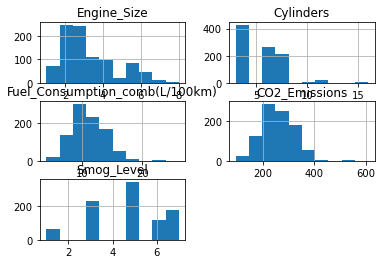

In [21]:
plot=new_df[['Engine_Size','Cylinders','Fuel_Consumption_comb(L/100km)','CO2_Emissions','Smog_Level']]
plot.hist()
plt.show()


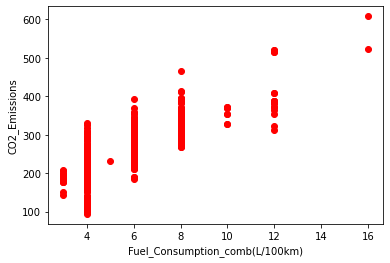

In [20]:
plt.scatter(new_df.Cylinders, new_df.CO2_Emissions, color= "red")
plt.xlabel("Fuel_Consumption_comb(L/100km)")
plt.ylabel("CO2_Emissions")
plt.show()

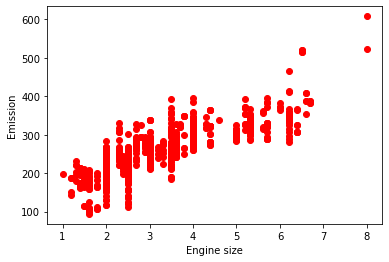

In [16]:
plt.scatter(new_df.Engine_Size, new_df.CO2_Emissions,  color='red')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()


In [30]:
#Splitting our dataset into train and test sets.(95% , 5%)
split=np.random.rand(len(df)) < 0.95
train = new_df[split]
test = new_df[~split]

In [59]:
#Modeling
regre = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Engine_Size']])
train_y = np.asanyarray(train[['CO2_Emissions']])
regre.fit (train_x, train_y)

LinearRegression()

Text(0, 0.5, 'Emissions')

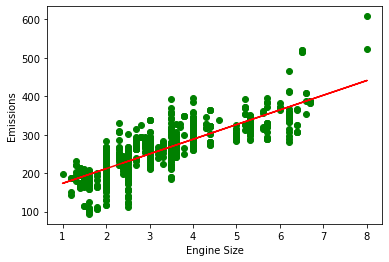

In [54]:
#Plotting the fit line over the data
plt.scatter(train.Engine_Size, train.CO2_Emissions, color = 'green')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')


In [58]:
#Evaluation
test_x = np.asanyarray(test[['Engine_Size']])
test_y = np.asanyarray(test[['CO2_Emissions']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of square : %.2f" % np.mean((test_y_ - test_y)**2))
print("R2-score: %.2f" % r2_score(test_y, test_y_))
print("Variance: %.2f" % regr.score(train_x, train_y))

Mean absolute error: 23.37
Residual sum of square : 947.97
R2-score: 0.70
Variance: 0.68


In [ ]:
#Multiple Regression

In [60]:
#Modeling
regre1 = linear_model.LinearRegression()
x = np.asanyarray(train[['Engine_Size','Cylinders','Fuel_Consumption_comb(L/100km)']])
y = np.asanyarray(train[['CO2_Emissions']])
regre1.fit (x, y)

LinearRegression()

In [ ]:
#Predictions
y_hat = regre1.predict(test[['Engine_Size','Cylinders','Fuel_Consumption_comb(L/100km)']])
x=np.asanyarray(test[['Engine_Size','Cylinders','Fuel_Consumption_comb(L/100km)']])